In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
"""
시스템에 따라 기본 한글 폰트를 읽어 들인다.
"""
import platform
from matplotlib import font_manager, rc
import re

pattern = re.compile("Linux|Ubuntu")
    
# 폰트를 적재한다.
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# elif pattern.search(platform.platform()):
elif 'Ubuntu' in platform.platform() or 'Linux' in platform.platform():
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif 'SuSE' in platform.platform():
    path = "/usr/share/fonts/truetype/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
diabetes = pd.read_csv('./diabetes.csv')
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 시각화

In [7]:
feature_columns = diabetes.columns[:-1]
feature_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### count plot

당뇨병 발병 여부를 판단하기 위해서 발병하는 빈도수를 표시. 카운트플롯은 범주형에 대한 빈도를 표시하기 좋음.


In [8]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
diabetes['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

임신횟수와 발병여부를 묶어 보면, 임신횟수가 많을수록 비율이 높은것을 알 수 있다.

In [10]:
diabetes.groupby(['Pregnancies'])['Outcome'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [11]:
diabetes.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count'])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


<AxesSubplot:>

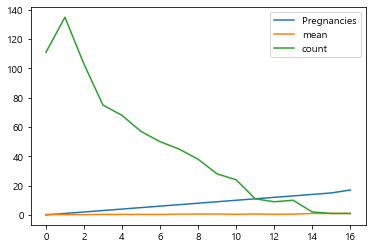

In [12]:
df_po = diabetes.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index()
df_po.plot()

<AxesSubplot:>

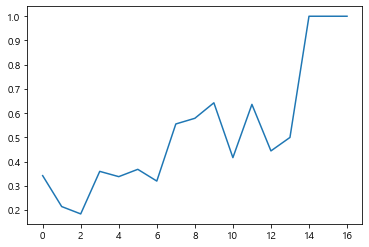

In [14]:
df_po['mean'].plot()

### seabonr 이용


<AxesSubplot:xlabel='Outcome', ylabel='count'>

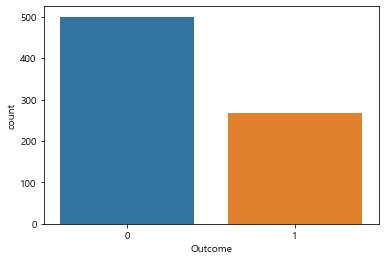

In [15]:
sns.countplot(data=diabetes, x='Outcome')

임신횟수에 따른 당뇨병 발병 빈도수를 비교해 보자

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

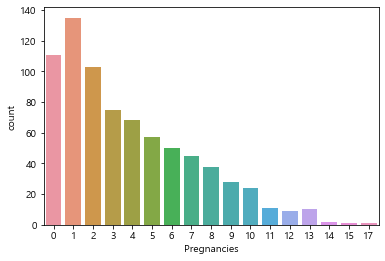

In [16]:
sns.countplot(data=diabetes, x='Pregnancies')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

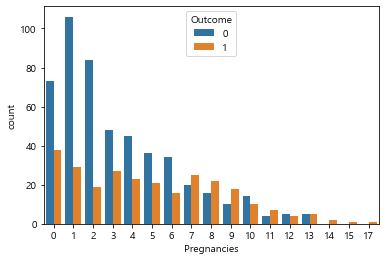

In [17]:
sns.countplot(data=diabetes, x='Pregnancies', hue='Outcome')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

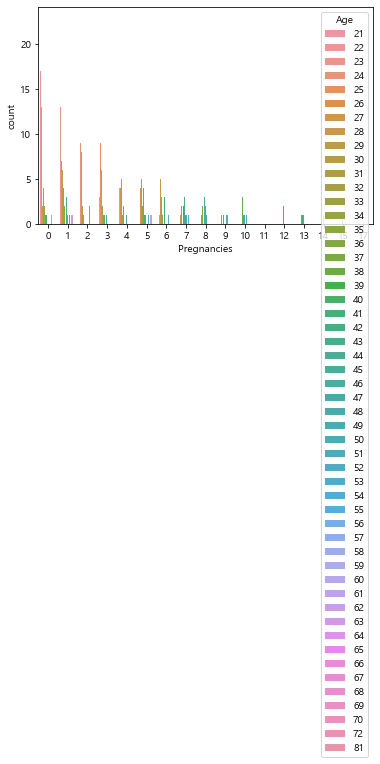

In [18]:
sns.countplot(data=diabetes, x='Pregnancies', hue='Age')

In [19]:
diabetes['Pregnancies_high'] = diabetes['Pregnancies'] > 6
diabetes[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

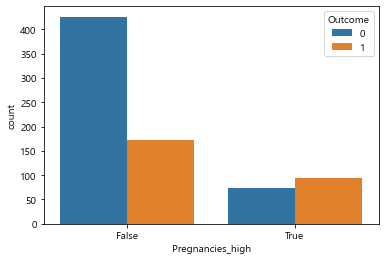

In [20]:
sns.countplot(data=diabetes, x='Pregnancies_high', hue='Outcome')

### barplot

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

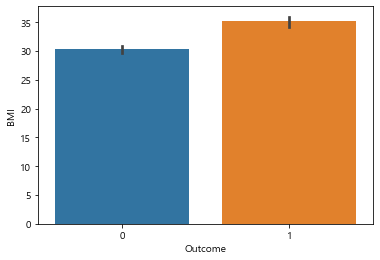

In [21]:
#당뇨병 발병에 따른 BMI 수치를 시본의 바플롯을 그려보자

sns.barplot(data=diabetes, x='Outcome', y='BMI')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

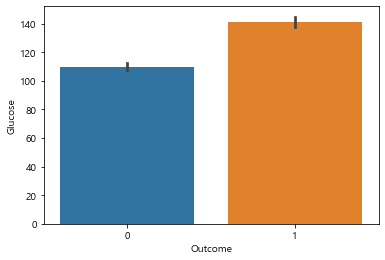

In [22]:
sns.barplot(data=diabetes, x='Outcome', y='Glucose')

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

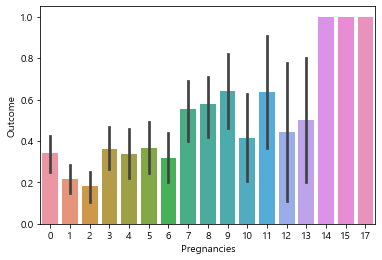

In [23]:
sns.barplot(data=diabetes, x='Pregnancies', y='Outcome')

결측값 제외한 인슐린 수치

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

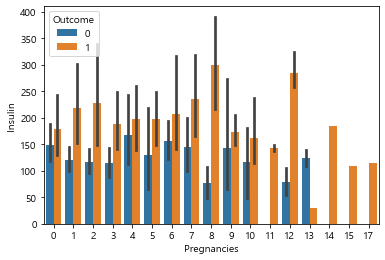

In [24]:
sns.barplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

#### boxplot()

인슐린수치가 높으며 에 따라 발병이 높아 보인다. 이것을 박스플롯으로 그려보면


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

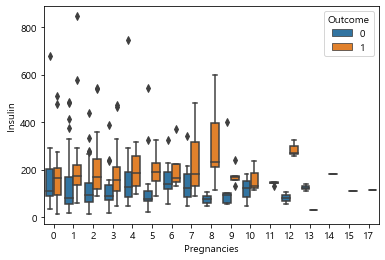

In [26]:
sns.boxplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

### violinplot()

violinplot 으로 그려보자, 박스플롯은 박스가 표시하는 분포를 알기 어려운데, 바이올린 플롯은 분포를 볼 수 있다.


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


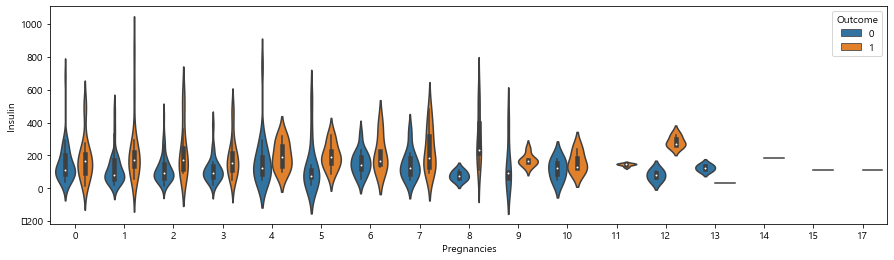

In [27]:
plt.figure(figsize=(15,4))

sns.violinplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

### swarmplot()

스왐플롯은 산점도를 그려준다.


C:\Users\BIT\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\BIT\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

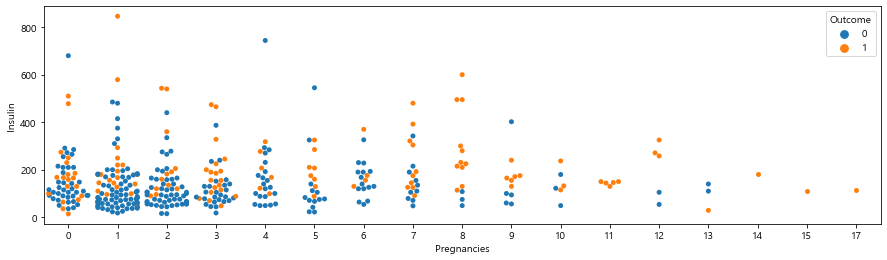

In [28]:
plt.figure(figsize=(15,4))

sns.swarmplot(data=diabetes[diabetes['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

### distplot()

한개의 연속된 수치 데이터를 표현할 때 디스트 플롯으로 그린다.


C:\Users\BIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

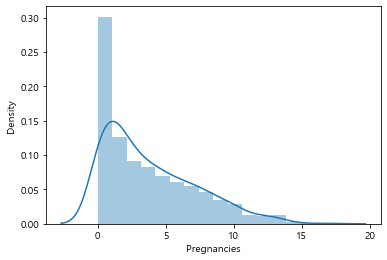

In [29]:
sns.distplot(diabetes['Pregnancies'])

임신횟수에 따른 당뇨병 발병 여부를 시각화 한다.

In [30]:
df_0, df_1 = diabetes[diabetes['Outcome'] == 0], diabetes[diabetes['Outcome'] == 1]

C:\Users\BIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

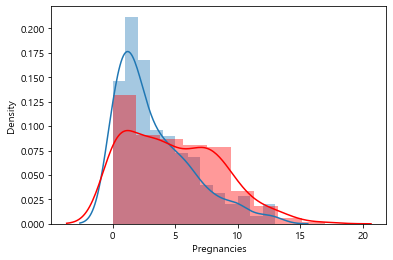

In [31]:
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'], color='r')

In [33]:
cols = diabetes.columns[:-1]

C:\Users\BIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

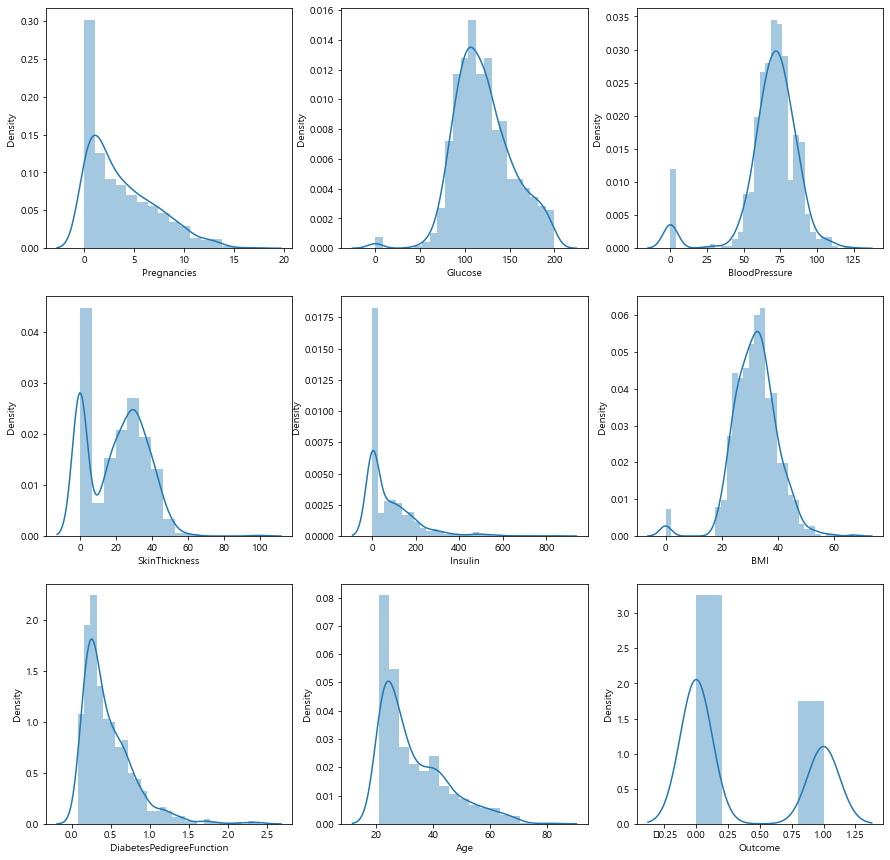

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, name in enumerate(cols):
    row = i // 3
    col = i % 3
#     print(i, name, row, col)
    sns.distplot(diabetes[name], ax=axes[row][col])

## 상관관계

모든 데이터의 상관관계를 그려보자, 대각선은 자신이므로 1 값이고, 상관계수가 큰 것은 진한 색으로 표시된다.

In [35]:
df_corr = diabetes.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

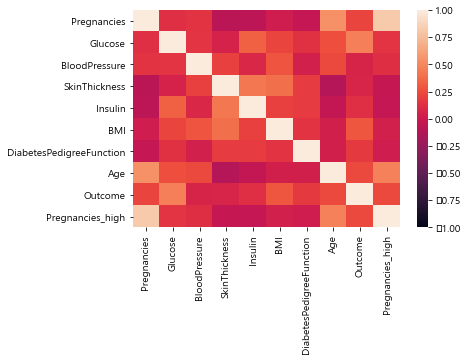

In [36]:
sns.heatmap(df_corr, vmax=1, vmin=-1)